In [353]:
########### Codigo lee archivo excel desde github
import pandas as pd
import numpy as np
from pandas import DataFrame
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import set_config
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, classification_report,mean_squared_error
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,RandomForestRegressor
set_config(display='diagram')


url = "https://github.com/Jorge2018/RepositorioArchivos/blob/main/Fish.xlsx?raw=true"

response = requests.get(url)

dest = 'local-file.xlsx'

with open(dest, 'wb') as file:
    file.write(response.content)

df = pd.read_excel(dest)

df.head()



,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [354]:
df.describe().round(3)

,Weight,Length1,Length2,Length3,Height,Width
count,159.000,157.000,157.000,150.000,156.000,157.000
mean,398.326,26.080,28.168,31.196,8.907,4.417
std,357.978,9.939,10.407,11.072,4.250,1.695
min,0.000,7.500,8.400,10.800,1.728,1.048
25%,120.000,19.000,21.000,23.275,5.949,3.376
50%,273.000,25.000,27.000,29.700,7.733,4.248
75%,650.000,32.500,35.000,39.575,12.038,5.589
max,1650.000,59.000,60.000,64.000,18.957,8.142


Se puede observar una correlacion entre el peso (Weigth) y los largos (1,2,3)



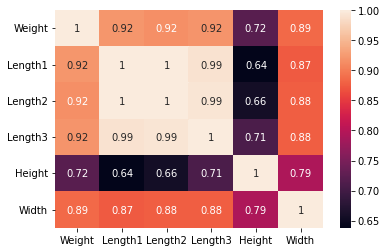

In [355]:
lista=list(df.columns)
idx = len(df) 
cols = df.columns
corr = df.corr() 
sns.heatmap(corr, annot = True) 
print('Se puede observar una correlacion entre el peso (Weigth) y los largos (1,2,3)\n')

**Utiliza OneHotEncoder para la transformacion de datos categoricos (Species), elimina col (Species) al finalizar el proceso**

In [356]:
one_hot_encoder = OneHotEncoder()                          # Asignacion a one_hot_encoder de la funcion
one_hot_encoder.fit(df[["Species"]])                        # Estimacion de los parámetros de la col
ohe = one_hot_encoder.transform(df[["Species"]]) # Transformamos los datos de df a números
df_encoded = pd.DataFrame(ohe.toarray(), columns=one_hot_encoder.categories_[0]) # creacion del df usando region_encoded y los nombres de col one_hot_encoder.categories_
df = pd.concat([df, df_encoded], axis=1)
df=df[['Weight','Length1','Length2','Length3','Height','Width','Beam','Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish']]


**Utiliza SimpleImputer para reemplzar valores nan, reemplaza valores 0 por la media segun cols de los datos numericos**

In [357]:
df_num=df.select_dtypes(include=['float64', 'int64'])
imputer = SimpleImputer(strategy="median")
imputer.fit(df_num)
#print(imputer.statistics_) # valores de mediana por cada columna numérica
df = pd.DataFrame(imputer.transform(df_num), columns=df_num.columns, index=df_num.index)
#df2#.info() # Valores nulos reemplazados
lista=['Weight','Length1','Length2','Length3','Height','Width']
for idx, column in enumerate(lista):
#for i in df.columns:
  df[column]=np.where(df[column] == 0,np.nanmean(df[column]),df[column])
  #df[i].fillna(df[i].mean()), inplace=True

**Inspeccion de datos**

In [358]:
#inspect the data
print(df.info(), '\n')
print('________________________________________________________')
print('')
print('los datos null son')
print(df.isna().sum())
df.describe().round(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Weight     159 non-null    float64
 1   Length1    159 non-null    float64
 2   Length2    159 non-null    float64
 3   Length3    159 non-null    float64
 4   Height     159 non-null    float64
 5   Width      159 non-null    float64
 6   Beam       159 non-null    float64
 7   Bream      159 non-null    float64
 8   Parkki     159 non-null    float64
 9   Perch      159 non-null    float64
 10  Pike       159 non-null    float64
 11  Roach      159 non-null    float64
 12  Smelt      159 non-null    float64
 13  Whitefish  159 non-null    float64
dtypes: float64(14)
memory usage: 17.5 KB
None 

________________________________________________________

los datos null son
Weight       0
Length1      0
Length2      0
Length3      0
Height       0
Width        0
Beam         0
Bream        0
Parkki   

,Weight,Length1,Length2,Length3,Height,Width,Beam,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,159.000,159.000,159.000,159.000,159.000,159.000,159.000,159.000,159.000,159.000,159.000,159.000,159.000,159.000
mean,400.832,26.067,28.153,31.111,8.885,4.415,0.013,0.208,0.069,0.333,0.107,0.119,0.088,0.038
std,356.564,9.877,10.342,10.757,4.213,1.684,0.112,0.407,0.255,0.473,0.310,0.325,0.284,0.191
min,5.900,7.500,8.400,10.800,1.728,1.048,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,122.500,19.050,21.000,23.500,6.032,3.386,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,290.000,25.000,27.000,29.700,7.733,4.248,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,650.000,32.250,35.000,39.350,11.931,5.584,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
max,1650.000,59.000,60.000,64.000,18.957,8.142,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [366]:
for col in df.columns:
    print('la columna {} tiene {} valores null'.format(col,df[col].isnull().sum()))

la columna Weight tiene 0 valores null
la columna Length1 tiene 0 valores null
la columna Length2 tiene 0 valores null
la columna Length3 tiene 0 valores null
la columna Height tiene 0 valores null
la columna Width tiene 0 valores null
la columna Beam tiene 0 valores null
la columna Bream tiene 0 valores null
la columna Parkki tiene 0 valores null
la columna Perch tiene 0 valores null
la columna Pike tiene 0 valores null
la columna Roach tiene 0 valores null
la columna Smelt tiene 0 valores null
la columna Whitefish tiene 0 valores null


**Separa valores en X, y**

In [360]:
# Dividan
X = df.drop('Weight', axis=1)
y = df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Inspeccion de resultados**

In [361]:
lr = LinearRegression() 
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(r2_score(y_test, pred))


0.8757388399789058


**Random Forest**

In [362]:
rfr = RandomForestRegressor()
param_grid = {'max_depth':np.arange(3,11),'max_features':np.arange(1,7),'n_estimators':[60,80,100,150,200]}

**GridSearchCV**

In [363]:
gscv = GridSearchCV(rfr,param_grid=param_grid,verbose=True,cv=5,n_jobs=-1)
gscv.fit(X_train,y_train)
gscv.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


{'max_depth': 8, 'max_features': 6, 'n_estimators': 80}

In [364]:
rfr = RandomForestRegressor(max_depth= 8 ,max_features = 2,n_estimators =100,oob_score=True)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=2, oob_score=True)

In [365]:
print(mean_squared_error(rfr.predict(X_train),y_train))
print(mean_squared_error(rfr.predict(X_test),y_test))

1624.657123831394
3521.3085025711957


**Segun los resultados obtenidos el modelo que mejor se acomoda es el de regresion lineal (mas cercano a 100)**